### Problem Statement

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [2]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

combined = pd.concat([train, test], ignore_index = True)

train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [3]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     30000 non-null  object        
 1   Package Name                30000 non-null  object        
 2   Package Type                30000 non-null  object        
 3   Destination                 30000 non-null  object        
 4   Itinerary                   30000 non-null  object        
 5   Places Covered              30000 non-null  object        
 6   Travel Date                 30000 non-null  datetime64[ns]
 7   Hotel Details               30000 non-null  object        
 8   Start City                  30000 non-null  object        
 9   Airline                     30000 non-null  object        
 10  Flight Stops                30000 non-null  int64         
 11  Meals                       30000 non-null  int64     

In [7]:
# Convert the travel Date into Datetime
import warnings
warnings.filterwarnings("ignore")

combined["Travel Date"] = pd.to_datetime(combined["Travel Date"])

In [9]:
# Extract the Date, Month and Year

combined["Date"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

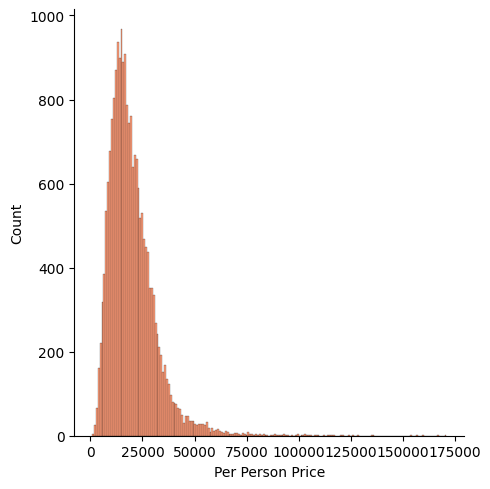

In [11]:
# Lets analyse the target variable....

sns.displot(x = 'Per Person Price', data = combined, color ="coral")
plt.show()

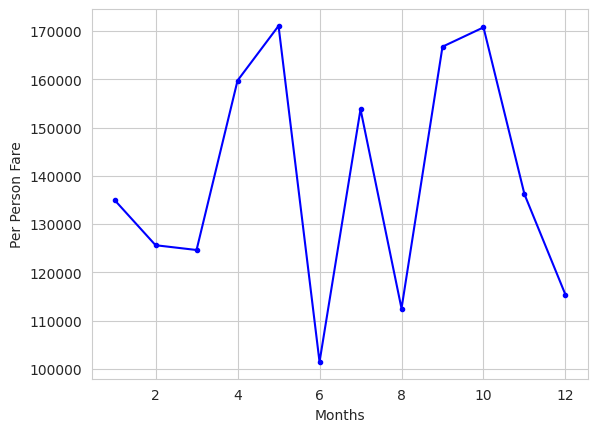

In [22]:
# Lets analyse the target var w.r.t Month
sns.set_style("whitegrid")
max_month = combined.groupby("Month")["Per Person Price"].max()

plt.plot(max_month.index, max_month, color = "blue", marker = ".")
plt.xlabel("Months")
plt.ylabel("Per Person Fare")
plt.show()

# peak months = 4, 5, 7, 9, 10

In [24]:
# peak months = 4, 5, 7, 9, 10

combined["Peak_Months"] = combined.Month.apply(lambda x:"peak_month"
                                  if x in [4,5,7,9,10] else "normal_month")

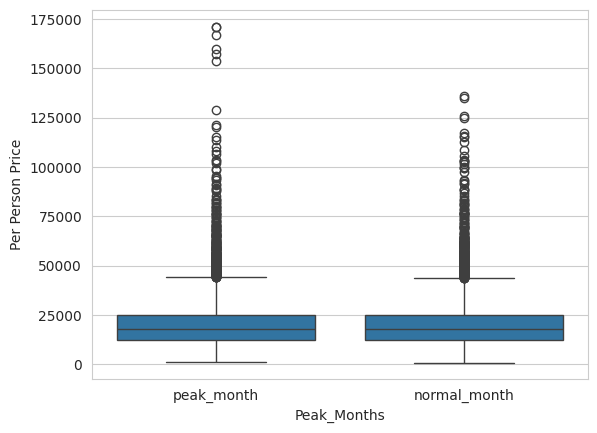

In [25]:
sns.boxplot(x = 'Peak_Months', y = "Per Person Price", data = combined)
plt.show()

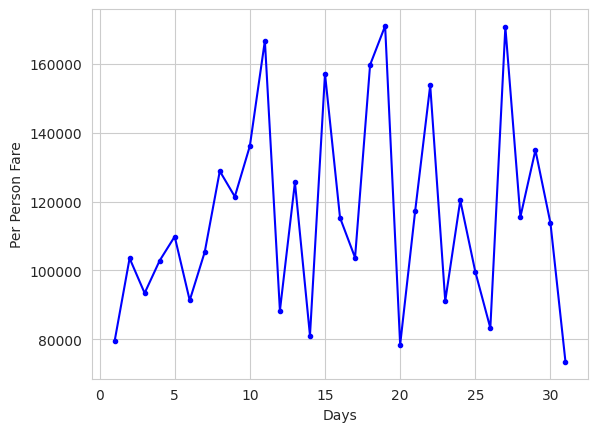

In [28]:
# Lets analyse the target var w.r.t Month
sns.set_style("whitegrid")
max_month = combined.groupby("Date")["Per Person Price"].max()

plt.plot(max_month.index, max_month, color = "blue", marker = ".")
plt.xlabel("Days")
plt.ylabel("Per Person Fare")
plt.show()

# Peak Dates: 8,10,11,13,15, 18, 19, 22, 24, 27, 29

In [30]:
# Peak Dates: 8,10,11,13,15, 18, 19, 22, 24, 27, 29

combined["Peak_Date"] = combined.Date.apply(lambda x:"peak_date"
                    if x in [8,10,11,13,15, 18, 19, 22, 24, 27, 29]
                    else "normal_date")

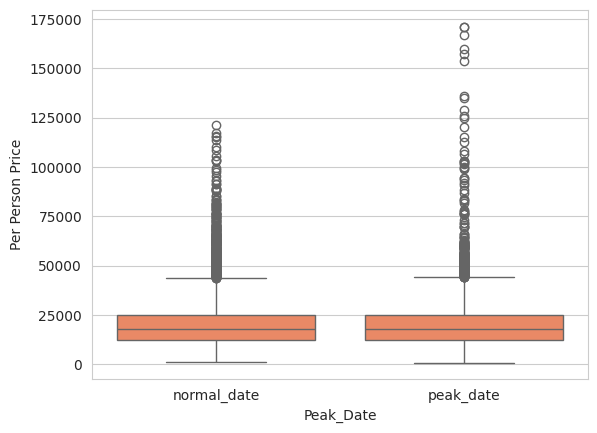

In [31]:
sns.boxplot(x = 'Peak_Date', y = "Per Person Price", data = combined, color = "coral")
plt.show()

In [96]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Date,Month,Year,Peak_Months,Peak_Date,Location_Count,Airline_Count,Count_SightSeeing
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,peak_month,normal_date,4,1,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens |...,Cancellation any time after making the 1st pay...,22485.5,8,12,2021,normal_month,peak_date,3,2,7
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon k...,Cancellation any time after making the 1st pay...,12421.5,26,4,2021,peak_month,normal_date,2,1,8
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum ...,Cancellation any time after making the 1st pay...,35967.0,27,8,2021,normal_month,peak_date,4,1,9
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spee...",Cancellation any time after making the 1st pay...,25584.0,12,12,2021,normal_month,normal_date,2,2,2


In [41]:
combined["Location_Count"] = combined["Destination"].apply(lambda x:len(x.split("|")))

In [43]:
combined["Airline_Count"] = combined["Airline"].apply(lambda x:len(x.split("|")))

In [50]:
combined["Sightseeing Places Covered"].unique()[50]

' Changu Lake - Excursion | Baba Mandir | Yumthang Valley '

In [53]:
import re
def clean_text(text):
  # remove the hyperlinks, characters
  text = re.sub('(www.+)|(https:.?)|(http:.?)|(@[a-zA-Z]+)|(\W+)|(\s+)', " ", text)
  text = re.sub('[^a-zA-Z0-9]', " ", text)
  text = re.sub('\w+:/\S+', " ", text) # Select the Weblink and remove it
  text = re.sub('\d+', " ", text) # Remove Digits
  text = re.sub('\s+', " ", text).strip() # Remove Extra WhiteLine Space...
  return(text)

In [80]:
# Function for sightseeing...
def regex_sight(text):
  text = re.sub('\[^a-zA-Z0-9|]+', " ", text)
  text = re.sub('\s+', " ", text).strip()
  return(text)

In [85]:
#len(combined["Sightseeing Places Covered"].apply(regex_sight)[49].split("|"))

combined["Sightseeing Places Covered"] = combined["Sightseeing Places Covered"].\
apply(regex_sight)

combined["Count_SightSeeing"] = combined["Sightseeing Places Covered"].\
apply(lambda x:len(x.split("|")))

In [98]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Date,Month,Year,Peak_Months,Peak_Date,Location_Count,Airline_Count,Count_SightSeeing
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,peak_month,normal_date,4,1,1


In [100]:
combined.Itinerary.unique()[0]

'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

In [109]:
#np.sum(pd.to_numeric(re.findall("\d+", combined.Itinerary.unique()[0])))

def duration(text):
  text = re.findall("\d+", text)
  count = np.sum(pd.to_numeric(text))
  return(count)


combined["Holidays"] = combined.Itinerary.apply(duration)

In [112]:
combined["Package Name"] = combined["Package Name"].apply(clean_text)

In [114]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [115]:
# Apply the Sentence Tokenizer
sentences = [sent_tokenize(word) for word in combined["Package Name"]]

In [122]:
# Stopwords

stop = stopwords.words("english")

tokens = [word for word in sentences if word not in stop]

<Axes: xlabel='0'>

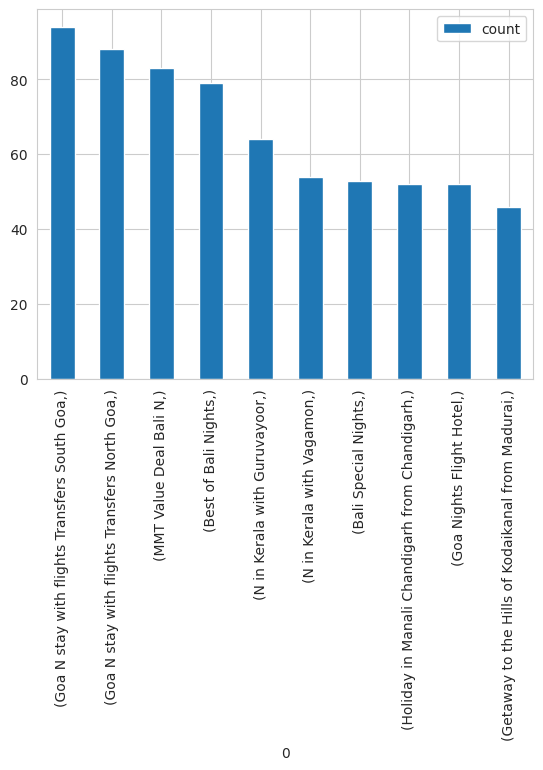

In [133]:
pd.DataFrame(pd.DataFrame(tokens).value_counts())[:10].plot(kind = "bar")

In [136]:
combined['Hotel Details'].unique()[:10]

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4',
       'Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:',
       'Dusit Thani Pattaya - MMT Special:4.5|Amari Watergate Hotel Bangkok - MMT Special:4.2',
       'Ratnawali A Vegetarian Heritage Hotel:4.1',
       'The Himalayan Village:Four|The Holiday Resorts, Cottages & Spa:Four',
       'California Group of Houseboats:3.6|The Rosewood Hotel:3.4|The Chinar Resort & Spa:4.6|California Group of Houseboats:3.6',
       'Chunda Palace:4.6',
       'UDAY SAMUDRA LEISURE BEACH HOTEL & SPA-MMT Holidays Special:4|Hotel Sivamurugan:'],
      dtype=object)

In [182]:
#np.median(pd.to_numeric(re.findall("[\d.]+", combined["Hotel Details"][1])))

def regex_hotels(text):
  if text=="Not Available":
    return(0)
  else:
    text = re.sub("[0-9].\d+|[\d.]+"," ", text)
    text = pd.to_numeric(text)
    if isinstance(text, pd.non_numeric):
      return(0)
    else:
      return(float(text))

In [183]:
combined["Hotel Details"].apply(regex_hotels)
#np.median(pd.to_numeric(re.findall("[\d.]+", combined["Hotel Details"][3])))

ValueError: Unable to parse string "The Orchard Retreat & Spa: |WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group: |The Orchard Retreat & Spa: " at position 0

In [211]:
nos = ['4.6', '4.1', '.','The Orchard Retreat & Spa: |WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group: |The Orchard Retreat & Spa: ']

re.sub('[0-9].\d+|[\d.]|[\s+]', "", nos)

TypeError: expected string or bytes-like object

In [190]:
combined["New_Hotel"] = combined["Hotel Details"].apply(regex_sight)

combined["Hotel_Count"] = combined.New_Hotel.apply(lambda x:len(x.split("|")))

In [193]:
new = combined.drop(['Uniq Id', 'Package Name','Destination', 'Itinerary',
               'Places Covered', 'Travel Date', 'Hotel Details',
               'Airline', 'Sightseeing Places Covered',
       'Cancellation Rules'], axis = 1)

In [194]:
new.head()

,Package Type,Start City,Flight Stops,Meals,Per Person Price,Date,Month,Year,Peak_Months,Peak_Date,Location_Count,Airline_Count,Count_SightSeeing,Holidays,New_Hotel,Hotel_Count
0,Standard,Mumbai,2,3,11509.0,30,7,2021,peak_month,normal_date,4,1,1,6,Not Available,1
1,Premium,New Delhi,0,5,22485.5,8,12,2021,normal_month,peak_date,3,2,7,4,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,3
2,Luxury,New Delhi,0,4,12421.5,26,4,2021,peak_month,normal_date,2,1,8,3,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,2
3,Premium,New Delhi,0,5,35967.0,27,8,2021,normal_month,peak_date,4,1,9,6,Elixir Hills Suites Resort & Spa-MMT Holidays ...,4
4,Premium,New Delhi,0,5,25584.0,12,12,2021,normal_month,normal_date,2,2,2,7,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,2


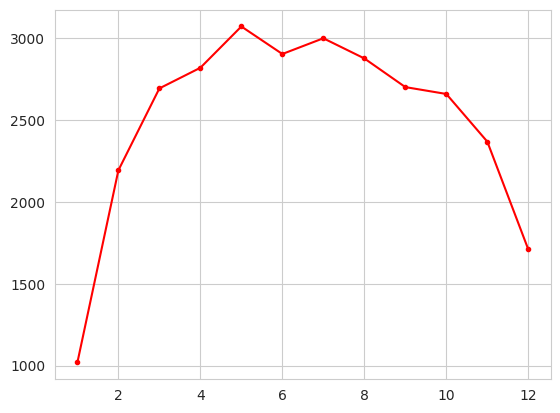

In [198]:
travel = new.groupby("Month")["Holidays"].count()

plt.plot(travel.index, travel, marker = ".", color = "red")
plt.show()

In [202]:
new["holiday_freq"] = new.groupby("Month")["Holidays"].transform("count")
new["holiday_min"] = new.groupby("Month")["Holidays"].transform("min")
new["holiday_max"] = new.groupby("Month")["Holidays"].transform("max")
new["holiday_mean"] = new.groupby("Month")["Holidays"].transform("mean")
new["holiday_median"] = new.groupby("Month")["Holidays"].transform("median")

In [204]:
new["Package Type"].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

In [207]:
new.groupby(["Package Type"])["Holidays"].describe()

new["magic1"] = new.groupby(["Package Type"])["Holidays"].transform("count")
new["magic2"] = new.groupby(["Package Type"])["Holidays"].transform("mean")
new["magic3"] = new.groupby(["Package Type"])["Holidays"].transform("median")
new["magic4"] = new.groupby(["Package Type"])["Holidays"].transform("min")
new["magic5"] = new.groupby(["Package Type"])["Holidays"].transform("max")

In [208]:
new.groupby(["Package Type"])["Per Person Price"].describe()
new["magic_1"] = new.groupby(["Package Type"])["Per Person Price"].transform("count")
new["magic_2"] = new.groupby(["Package Type"])["Per Person Price"].transform("mean")
new["magic_3"] = new.groupby(["Package Type"])["Per Person Price"].transform("median")
new["magic_4"] = new.groupby(["Package Type"])["Per Person Price"].transform("min")
new["magic_5"] = new.groupby(["Package Type"])["Per Person Price"].transform("max")

In [213]:
new.drop(["Date", "Month", "Year"], axis = 1, inplace = True)

In [215]:
mapp = {"Budget": 1, "Deluxe": 5, "Luxury": 2, "Premium": 4, "Standard":3 }
new["Package Type"] = new["Package Type"].map(mapp)

In [218]:
# Split the Data into Train and Test
newtrain =new.loc[0:train.shape[0]-1, :]
newtest =new.loc[train.shape[0]:, :]

train.shape, test.shape, newtrain.shape, newtest.shape

((21000, 15), (9000, 14), (21000, 28), (9000, 28))

In [219]:
# Drop the target variable from the test set and  hotel details from both

newtrain.drop("New_Hotel", axis = 1, inplace = True)
newtest.drop(["New_Hotel", "Per Person Price"], axis = 1, inplace = True)

In [221]:
# Modelling

# dummyfy...
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

dummytrain.shape, dummytest.shape

((21000, 27), (9000, 26))

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [224]:
def base_models():
  models = dict()
  models["LR"] = LinearRegression()
  models["Tree"] = DecisionTreeRegressor()
  models["RF"] = RandomForestRegressor()
  models["GBM"] = GradientBoostingRegressor()
  models["XGBOOST"] = XGBRegressor()
  models["LGBM"] = LGBMRegressor()
  return models

In [232]:
# Function to evaluate the models...
from sklearn.model_selection import KFold

def eval_models(model):
  cv = KFold(n_splits = 5, shuffle = True, random_state=4042024)
  score = -cross_val_score(estimator = model,
                           X = X, y = y,
                           scoring = "neg_root_mean_squared_error", n_jobs = -1)
  return(score)

In [238]:
X = dummytrain.drop("Per Person Price", axis = 1)
y = dummytrain["Per Person Price"]

# Lets use the function to calculate the scores...
models = base_models()
results, modelname = list(), list()

for name, mymodel in models.items():
  finalscore = eval_models(mymodel)# it will evaluate the model on the data
  results.append(finalscore) # append the final score....
  modelname.append(name)
  print(name, np.mean(finalscore))

LR 8205.806519153997
Tree 9446.113922524783
RF 7364.826578058877
GBM 7447.60015898337
XGBOOST 7047.555781221827
LGBM 7348.6927673965865


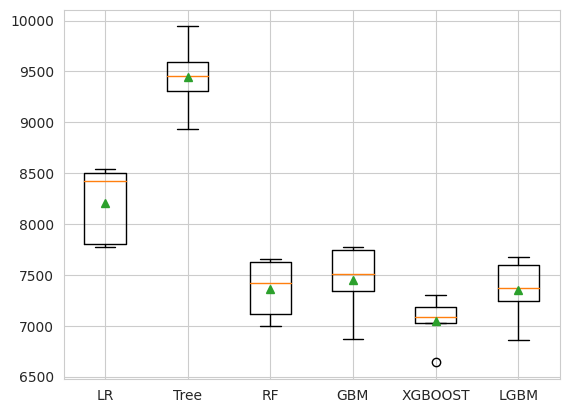

In [242]:
plt.boxplot(x = results, labels = modelname, showmeans = True)
plt.show()

In [244]:
# Stacking Model

from sklearn.ensemble import StackingRegressor

rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
lgbm = LGBMRegressor()
xgb = XGBRegressor()

stack = StackingRegressor(estimators = [("RF", rf), ("GBM", gbm),
 ("LGBM", lgbm)],final_estimator = xgb)

prediction = stack.fit(X, y).predict(dummytest)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 24
[LightGBM] [Info] Start training from score 20059.330381
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 24
[LightGBM] [Info] Start training from score 20072.302351
[LightGBM] [Warning] F

In [249]:
# Submission File...
submission = pd.DataFrame({"Per Person Price": prediction})
submission.to_csv("submission_new.csv", index = False)